# 1- Analyze and Explore DataFrame

In [134]:
#imports

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import load_model, Model
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import pandas as pd
import numpy as np
import argparse
import warnings
import math
import sys

plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

warnings.filterwarnings("ignore")

In [136]:
# reading data into pd.DataFrame

df = pd.read_hdf("/content/drive/MyDrive/waste_collection_diversion_report_daily(1).hdf", key='waste_collection_diversion_report_daily',parse_dates=[0, 2])

In [137]:
df.head()

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID
0,2020-12-08,BULK,2020-12-08 15:02:00,5220.0,TDS LANDFILL,BULK,BU13,899097
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082
3,2020-12-07,SWEEPING,2020-12-07 10:15:00,7100.0,TDS LANDFILL,SWEEPER DUMPSITES,DSS04,899030
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048


In [138]:
#print the shape dataframe
print("Shape The DataFrame ", df.shape )

Shape The DataFrame  (740873, 8)


In [139]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740873 entries, 0 to 740872
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Report Date   740873 non-null  datetime64[ns]
 1   Load Type     740873 non-null  object        
 2   Load Time     740873 non-null  datetime64[ns]
 3   Load Weight   668538 non-null  float64       
 4   Dropoff Site  740873 non-null  object        
 5   Route Type    740873 non-null  object        
 6   Route Number  740873 non-null  object        
 7   Load ID       740873 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 50.9+ MB


In [140]:
#checking null value 
df.isnull().sum()

Report Date         0
Load Type           0
Load Time           0
Load Weight     72335
Dropoff Site        0
Route Type          0
Route Number        0
Load ID             0
dtype: int64

#### No missing value with exception of 'Load Weight'. 
#### Drop rows with missing values 

In [141]:
df = df.dropna()
print("Shape The DataFrame ", df.shape )

Shape The DataFrame  (668538, 8)


In [142]:
# summary stats
df.describe().round(2)

,Load Weight,Load ID
count,668538.00,668538.00
mean,11763.48,524846.51
std,7554.86,250986.77
min,-4480.00,101223.00
25%,5740.00,291132.25
50%,11020.00,559416.50
75%,16520.00,746576.75
max,1562821.00,929006.00


In [143]:
df.groupby('Load Type').describe().round(2)

Load Weight                                        \
                                  count      mean       std      min      25%   
Load Type                                                                       
BAGGED LITTER                      43.0  12707.47  60824.11    320.0    700.0   
BRUSH                           39141.0   6000.94   2457.42      0.0   4260.0   
BULK                            40117.0   7497.19   4051.15      0.0   4680.0   
CONTAMINATED ORGANICS               1.0  25380.00       NaN  25380.0  25380.0   
CONTAMINATED RECYCLING              8.0   5700.00   4333.50    980.0   2775.0   
CONTAMINATED YARD TRIMMINGS         1.0   3740.00       NaN   3740.0   3740.0   
DEAD ANIMAL                      6856.0    454.51    594.75      0.0    100.0   
GARBAGE COLLECTIONS            258395.0  17083.57   7733.62      0.0  12020.0   
LITTER                           1539.0   3664.37   2634.34     20.0   1760.0   
MATTRESS                            9.0   3222.22   2590.38   1520.0   1940.0   
MIXED LITTER                     2110.0   3917.08   6939.25      0.0   1900.0   
MULCH                            1344.0   7969.18   4940.81     40.0   5000.0   
ORGANICS                        17705.0  10873.38   4830.01      0.0   7460.0   
RECYCLED METAL                   1049.0   2173.68   3241.11      0.0    500.0   
RECYCLING - COMINGLE            31116.0   3262.47   1546.67      0.0   2200.0   
RECYCLING - PAPER               32155.0   4405.59   2430.26      0.0   2480.0   
RECYCLING - PLASTIC BAGS           40.0    194.18    120.93     60.0    115.0   
RECYCLING - SINGLE STREAM      147612.0   9896.32   4258.20  -4480.0   6580.0   
SWEEPING                        16522.0  11538.74   6340.93      0.0   7740.0   
TIRES                            3205.0   2112.44   2095.99      0.0    900.0   
YARD TRIMMING                   69554.0  11352.30   5440.90      0.0   7400.0   
YARD TRIMMING - X-MAS TREES        16.0  11750.00   4828.76   5200.0   7635.0   

                                                           Load ID             \
                                 50%      75%        max     count       mean   
Load Type                                                                       
BAGGED LITTER                 3040.0   5190.0   401561.0      43.0  369343.77   
BRUSH                         5500.0   7240.0   109880.0   39141.0  506482.73   
BULK                          6920.0  10280.0   407022.0   40117.0  540447.10   
CONTAMINATED ORGANICS        25380.0  25380.0    25380.0       1.0  921301.00   
CONTAMINATED RECYCLING        4920.0   7575.0    13900.0       8.0  862171.12   
CONTAMINATED YARD TRIMMINGS   3740.0   3740.0     3740.0       1.0  813571.00   
DEAD ANIMAL                    260.0    640.0    14540.0    6856.0  533191.71   
GARBAGE COLLECTIONS          17780.0  22380.0  1562821.0  258395.0  517988.55   
LITTER                        3360.0   4770.0    25260.0    1539.0  560897.03   
MATTRESS                      2200.0   3120.0     9880.0       9.0  733846.22   
MIXED LITTER                  3400.0   4980.0   224397.0    2110.0  583593.60   
MULCH                         6220.0   9420.0    46740.0    1344.0  481993.54   
ORGANICS                     10600.0  14200.0    29660.0   17705.0  877064.35   
RECYCLED METAL                1410.0   2640.0    27320.0    1049.0  457936.57   
RECYCLING - COMINGLE          3320.0   4260.0    30760.0   31116.0  201016.54   
RECYCLING - PAPER             4180.0   6020.0    15000.0   32155.0  200630.47   
RECYCLING - PLASTIC BAGS       160.0    245.0      600.0      40.0  286980.12   
RECYCLING - SINGLE STREAM    10740.0  12760.0   324434.0  147612.0  633812.43   
SWEEPING                     10700.0  14520.0   401514.0   16522.0  505241.21   
TIRES                         1682.0   2668.0    29000.0    3205.0  534263.67   
YARD TRIMMING                11440.0  15480.0   403243.0   69554.0  528316.74   
YARD TRIMMING - X-MAS TREES  11630.0  14630.0    21120.0  

In [144]:
df['Load Type'].unique()

array(['BULK', 'RECYCLING - SINGLE STREAM', 'SWEEPING',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BRUSH', 'ORGANICS',
       'MIXED LITTER', 'RECYCLED METAL', 'TIRES', 'DEAD ANIMAL',
       'RECYCLING - COMINGLE', 'RECYCLING - PAPER', 'LITTER',
       'BAGGED LITTER', 'MULCH', 'MATTRESS', 'RECYCLING - PLASTIC BAGS',
       'CONTAMINATED RECYCLING', 'CONTAMINATED YARD TRIMMINGS',
       'YARD TRIMMING - X-MAS TREES', 'CONTAMINATED ORGANICS'],
      dtype=object)

In [145]:
df.groupby('Dropoff Site').count()

,Report Date,Load Type,Load Time,Load Weight,Route Type,Route Number,Load ID
Dropoff Site,,,,,,,
AUSTIN IRON AND METAL,376,376,376,376,376,376,376
AUSTIN WOOD RECYCLING,53,53,53,53,53,53,53
BALCONES RECYCLING,60086,60086,60086,60086,60086,60086,60086
BALCONES WOODS,42,42,42,42,42,42,42
BARTON SKYWAY,2,2,2,2,2,2,2
BFI LANDFILL,289,289,289,289,289,289,289
BRAKER SITE,2537,2537,2537,2537,2537,2537,2537
BURGER CENTER,7,7,7,7,7,7,7
CLARKSON,1,1,1,1,1,1,1


In [146]:
df['Day of Week'] = df['Report Date'].dt.dayofweek #Return the day of the week as an integer, where Monday is 0 and Sunday is 6
df['Year'] = df['Report Date'].dt.year
df['Month'] = df['Report Date'].dt.month
df['Day'] = df['Report Date'].dt.day
df['Weekend'] = df['Day of Week'] > 4
   

In [147]:
#austin_holidays = austin_holidays.rename(columns={1: "Date"})

#austin_holidays.to_hdf('data/austin_holidays.hdf', 'austin_holidays')

austin_holidays = pd.read_hdf('/content/drive/MyDrive/austin_holidays.hdf', 'austin_holidays')

austin_holidays
df['Holiday'] = df['Report Date'].isin(austin_holidays['Date'])
df['Holiday'].sum()

31746

In [148]:
df['Load Time'].min()

Timestamp('2000-01-26 12:39:00')

In [149]:
df['Load Time'].max()

Timestamp('2030-11-24 13:49:00')

In [150]:
filt = df['Load Time'] >= '2022'
df.loc[filt]

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Day of Week,Year,Month,Day,Weekend,Holiday
352538,2020-11-24,DEAD ANIMAL,2030-11-24 13:49:00,320.0,TDS LANDFILL,DEAD ANIMAL,DA02,897529,1,2020,11,24,False,False
730958,2020-07-29,DEAD ANIMAL,2030-07-29 14:08:00,260.0,TDS LANDFILL,DEAD ANIMAL,DA01,883665,2,2020,7,29,False,False


In [151]:
df['timedelta'] = df['Load Time']-df['Report Date']
filt = df['timedelta'] >= '30 days'
df.loc[filt]

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Day of Week,Year,Month,Day,Weekend,Holiday,timedelta
10584,2005-11-22,RECYCLING - COMINGLE,2005-12-22 13:37:00,3500.0,MRF,RECYCLING,RT15,154910,1,2005,11,22,False,False,30 days 13:37:00
11542,2006-06-28,RECYCLING - PAPER,2006-07-28 00:00:00,2600.0,MRF,RECYCLING,RWNON18,186421,2,2006,6,28,False,False,30 days 00:00:00
13706,2005-11-22,RECYCLING - COMINGLE,2005-12-22 15:37:00,3800.0,MRF,RECYCLING,RT11,154900,1,2005,11,22,False,False,30 days 15:37:00
15975,2018-09-25,RECYCLING - SINGLE STREAM,2020-06-16 13:00:00,10320.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTBU13,880297,1,2018,9,25,False,False,630 days 13:00:00
17837,2020-07-16,ORGANICS,2020-10-09 13:08:00,3340.0,ORGANICS BY GOSH,YARD TRIMMINGS-ORGANICS,OBH00,894898,3,2020,7,16,False,False,85 days 13:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740867,2008-03-31,RECYCLING - COMINGLE,2021-07-11 07:00:38,2580.0,MRF,RECYCLING,RM01,273140,0,2008,3,31,False,True,4850 days 07:00:38
740868,2008-04-09,RECYCLING - PAPER,2021-07-11 07:00:39,1080.0,MRF,RECYCLING,RW05,273708,2,2008,4,9,False,False,4841 days 07:00:39
740869,2015-12-01,BULK,2021-07-11 07:05:29,9360.0,TDS LANDFILL,STORM,HAFLDBU15,676651,1,2015,12,1,False,False,2049 days 07:05:29
740871,2008-04-09,RECYCLING - COMINGLE,2021-07-11 07:00:39,3960.0,MRF,RECYCLING,RW04,273706,2,2008,4,9,False,False,4841 days 07:00:39


In [152]:
df['ones'] = [1]*len(df.index)
df.groupby('Year').sum()

,Load Weight,Load ID,Day of Week,Month,Day,Weekend,Holiday,ones
Year,,,,,,,,
2003,2.017000e+04,681177,0,1,13,0,0,1
2004,9.934638e+07,1043385778,18962,107847,153464,140,561,9756
2005,3.980126e+08,5567960717,79535,268146,644384,390,1863,40847
2006,4.125157e+08,7976597656,85893,278675,680846,775,2257,43321
2007,4.404413e+08,10367694676,87560,291998,700883,845,2042,44352
2008,4.508247e+08,12950734630,89738,282406,714304,897,2102,45527
2009,4.496021e+08,12460375057,74319,239284,584580,650,1837,37602
2010,4.562672e+08,13668909124,71234,238454,573564,400,1784,36611
2011,4.442584e+08,16002238521,71022,229398,572679,476,1589,36275


#### Remove years before 2005

In [153]:
filt = df['Year'] >= 2005
df = df.loc[filt]
print("Shape The DataFrame ", df.shape )


Shape The DataFrame  (658781, 16)


In [154]:
df.groupby('Load Type').sum()

,Load Weight,Load ID,Day of Week,Year,Month,Day,Weekend,Holiday,ones
Load Type,,,,,,,,,
BAGGED LITTER,5.442810e+05,15552031,100,80395,210,638,3,1,40
BRUSH,2.326406e+08,19774537617,78012,77816726,249464,604775,1308,1340,38670
BULK,2.978867e+08,21646204852,72305,80089900,262229,623107,827,1371,39787
CONTAMINATED ORGANICS,2.538000e+04,921301,3,2021,5,13,0,0,1
CONTAMINATED RECYCLING,4.560000e+04,6897369,8,16157,52,69,0,2,8
CONTAMINATED YARD TRIMMINGS,3.740000e+03,813571,1,2019,1,29,0,0,1
DEAD ANIMAL,3.025470e+06,3647570158,16326,13649122,44145,105813,824,294,6781
GARBAGE COLLECTIONS,4.349123e+09,133438393954,486133,512397803,1631355,3998931,3531,12773,254593
LITTER,5.609910e+06,862364529,5206,3082356,9845,23820,521,53,1531


# Analyze and Explore Recycling vs Non-Recycling

In [155]:
filt = df['Load Type'].str.contains('RECY|YARD')
df.loc[filt]

,Report Date,Load Type,Load Time,Load Weight,Dropoff Site,Route Type,Route Number,Load ID,Day of Week,Year,Month,Day,Weekend,Holiday,timedelta,ones
1,2020-12-08,RECYCLING - SINGLE STREAM,2020-12-08 10:00:00,11140.0,TDS - MRF,RECYCLING - SINGLE STREAM,RTAU53,899078,1,2020,12,8,False,False,0 days 10:00:00,1
2,2020-12-03,RECYCLING - SINGLE STREAM,2020-12-03 10:34:00,10060.0,BALCONES RECYCLING,RECYCLING - SINGLE STREAM,RHBU10,899082,3,2020,12,3,False,False,0 days 10:34:00,1
4,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 16:00:00,12000.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU53,899048,0,2020,12,7,False,False,0 days 16:00:00,1
9,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 14:00:00,11600.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU51,899043,0,2020,12,7,False,False,0 days 14:00:00,1
10,2020-12-07,RECYCLING - SINGLE STREAM,2020-12-07 14:00:00,10520.0,TDS - MRF,RECYCLING - SINGLE STREAM,RMAU50,899041,0,2020,12,7,False,False,0 days 14:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740866,2008-03-31,RECYCLING - PAPER,2021-07-11 07:00:38,2640.0,MRF,RECYCLING,RM06,273157,0,2008,3,31,False,True,4850 days 07:00:38,1
740867,2008-03-31,RECYCLING - COMINGLE,2021-07-11 07:00:38,2580.0,MRF,RECYCLING,RM01,273140,0,2008,3,31,False,True,4850 days 07:00:38,1
740868,2008-04-09,RECYCLING - PAPER,2021-07-11 07:00:39,1080.0,MRF,RECYCLING,RW05,273708,2,2008,4,9,False,False,4841 days 07:00:39,1
740871,2008-04-09,RECYCLING - COMINGLE,2021-07-11 07:00:39,3960.0,MRF,RECYCLING,RW04,273706,2,2008,4,9,False,False,4841 days 07:00:39,1


In [156]:
dfR = df.loc[filt]
print("Shape Recycling DataFrame ", dfR.shape )

Shape Recycling DataFrame  (276932, 16)


In [157]:
dfR = dfR.groupby('Report Date')['Load Weight','Load Time'].sum()
dfR.rename(columns={'Load Weight': "Recycling Load Weight"},inplace=True)
dfR

,Recycling Load Weight
Report Date,
2005-01-03,445440.0
2005-01-04,475455.0
2005-01-05,390060.0
2005-01-06,452977.0
2005-01-07,473735.0
...,...
2021-07-02,326910.0
2021-07-05,304420.0
2021-07-06,337590.0


In [158]:
#Checking the dtypes of all the columns
dfR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4455 entries, 2005-01-03 to 2021-07-08
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Recycling Load Weight  4455 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [159]:
dfnonR = df.loc[~filt]
print("Shape nonRecycling DataFrame ", dfnonR.shape )

Shape nonRecycling DataFrame  (381849, 16)


In [160]:
dfnonR = dfnonR.groupby('Report Date')['Load Weight','Load Time'].sum()
dfnonR.rename(columns={'Load Weight': "No Recycling Load Weight"},inplace=True)
dfnonR

,No Recycling Load Weight
Report Date,
2005-01-03,1447524.0
2005-01-04,1284840.0
2005-01-05,1364220.0
2005-01-06,1299919.0
2005-01-07,955140.0
...,...
2021-07-05,1592870.0
2021-07-06,1584050.0
2021-07-07,1422720.0


In [161]:
#Checking the dtypes of all the columns
dfnonR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5184 entries, 2005-01-03 to 2021-07-09
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No Recycling Load Weight  5184 non-null   float64
dtypes: float64(1)
memory usage: 81.0 KB


In [162]:
df2 = dfnonR.join(dfR)
df2.isnull().sum()


No Recycling Load Weight      0
Recycling Load Weight       748
dtype: int64

In [163]:
df2.fillna(0)
df2['Recycling Rate'] = df2['Recycling Load Weight']/df2['No Recycling Load Weight']
df2['Recycling Rate'] = df2['Recycling Rate'].fillna(0)
df2['Recycling Rate'] = df2['Recycling Rate'].round(2)
df2['Total Waste'] = df2['Recycling Load Weight']+df2['No Recycling Load Weight']
df2

,No Recycling Load Weight,Recycling Load Weight,Recycling Rate,Total Waste
Report Date,,,,
2005-01-03,1447524.0,445440.0,0.31,1892964.0
2005-01-04,1284840.0,475455.0,0.37,1760295.0
2005-01-05,1364220.0,390060.0,0.29,1754280.0
2005-01-06,1299919.0,452977.0,0.35,1752896.0
2005-01-07,955140.0,473735.0,0.50,1428875.0
...,...,...,...,...
2021-07-05,1592870.0,304420.0,0.19,1897290.0
2021-07-06,1584050.0,337590.0,0.21,1921640.0
2021-07-07,1422720.0,130360.0,0.09,1553080.0


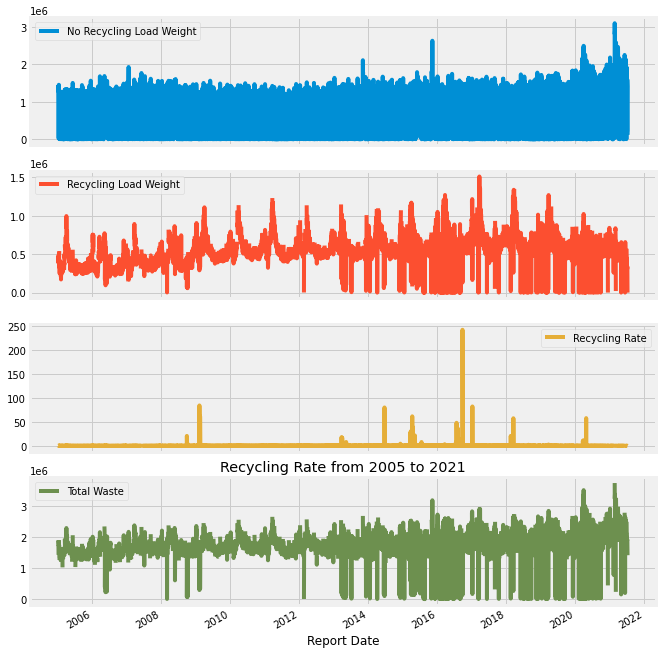

In [164]:
df2.plot(subplots=True, figsize=(10,12))
plt.title('Recycling Rate from 2005 to 2021')
plt.savefig('waste.png')
plt.show()

In [165]:
filt = df2['Recycling Rate'] >= 100
df2.loc[filt]

,No Recycling Load Weight,Recycling Load Weight,Recycling Rate,Total Waste
Report Date,,,,
2016-09-24,540.0,130720.0,242.07,131260.0


In [166]:
df2 = df2.loc[~filt]

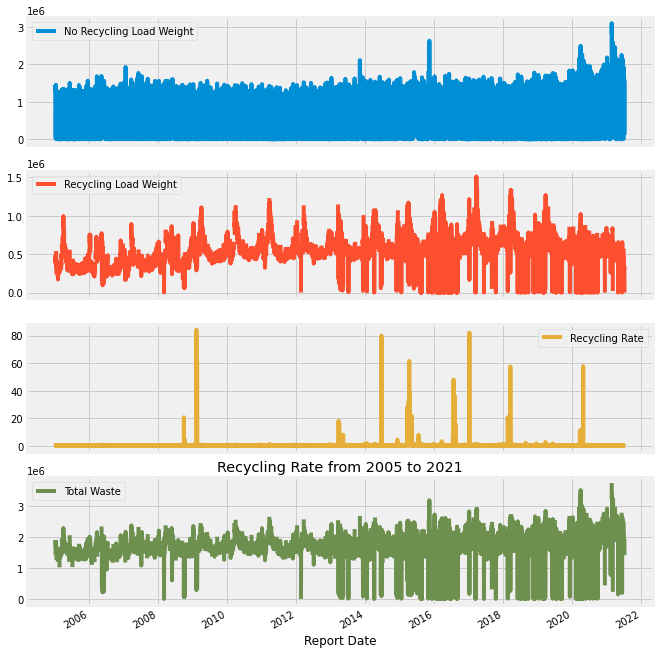

In [167]:
df2.plot(subplots=True, figsize=(10,12))
plt.title('Recycling Rate from 2005 to 2021')
plt.savefig('waste.png')
plt.show()

## Downsampling by week and performing aggregation

In [168]:
df3 = df2.resample('W').agg('sum')
df3['Recycling Rate'] =  df3['Recycling Load Weight']/df3['No Recycling Load Weight']
df3['Recycling Rate'] = df3['Recycling Rate'].round(2)
df3

,No Recycling Load Weight,Recycling Load Weight,Recycling Rate,Total Waste
Report Date,,,,
2005-01-09,6374943.000,2237667.0,0.35,8.589310e+06
2005-01-16,6213181.000,2360687.0,0.38,8.559008e+06
2005-01-23,5284037.000,1706910.0,0.32,6.985767e+06
2005-01-30,5304721.000,1792895.0,0.34,7.091636e+06
2005-02-06,5413996.000,1230900.0,0.23,6.636756e+06
...,...,...,...,...
2021-06-13,9473830.298,2502790.0,0.26,1.197662e+07
2021-06-20,8378250.000,2529890.0,0.30,1.086016e+07
2021-06-27,8167090.000,2218630.0,0.27,1.037992e+07


In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 862 entries, 2005-01-09 to 2021-07-11
Freq: W-SUN
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No Recycling Load Weight  862 non-null    float64
 1   Recycling Load Weight     862 non-null    float64
 2   Recycling Rate            862 non-null    float64
 3   Total Waste               862 non-null    float64
dtypes: float64(4)
memory usage: 33.7 KB


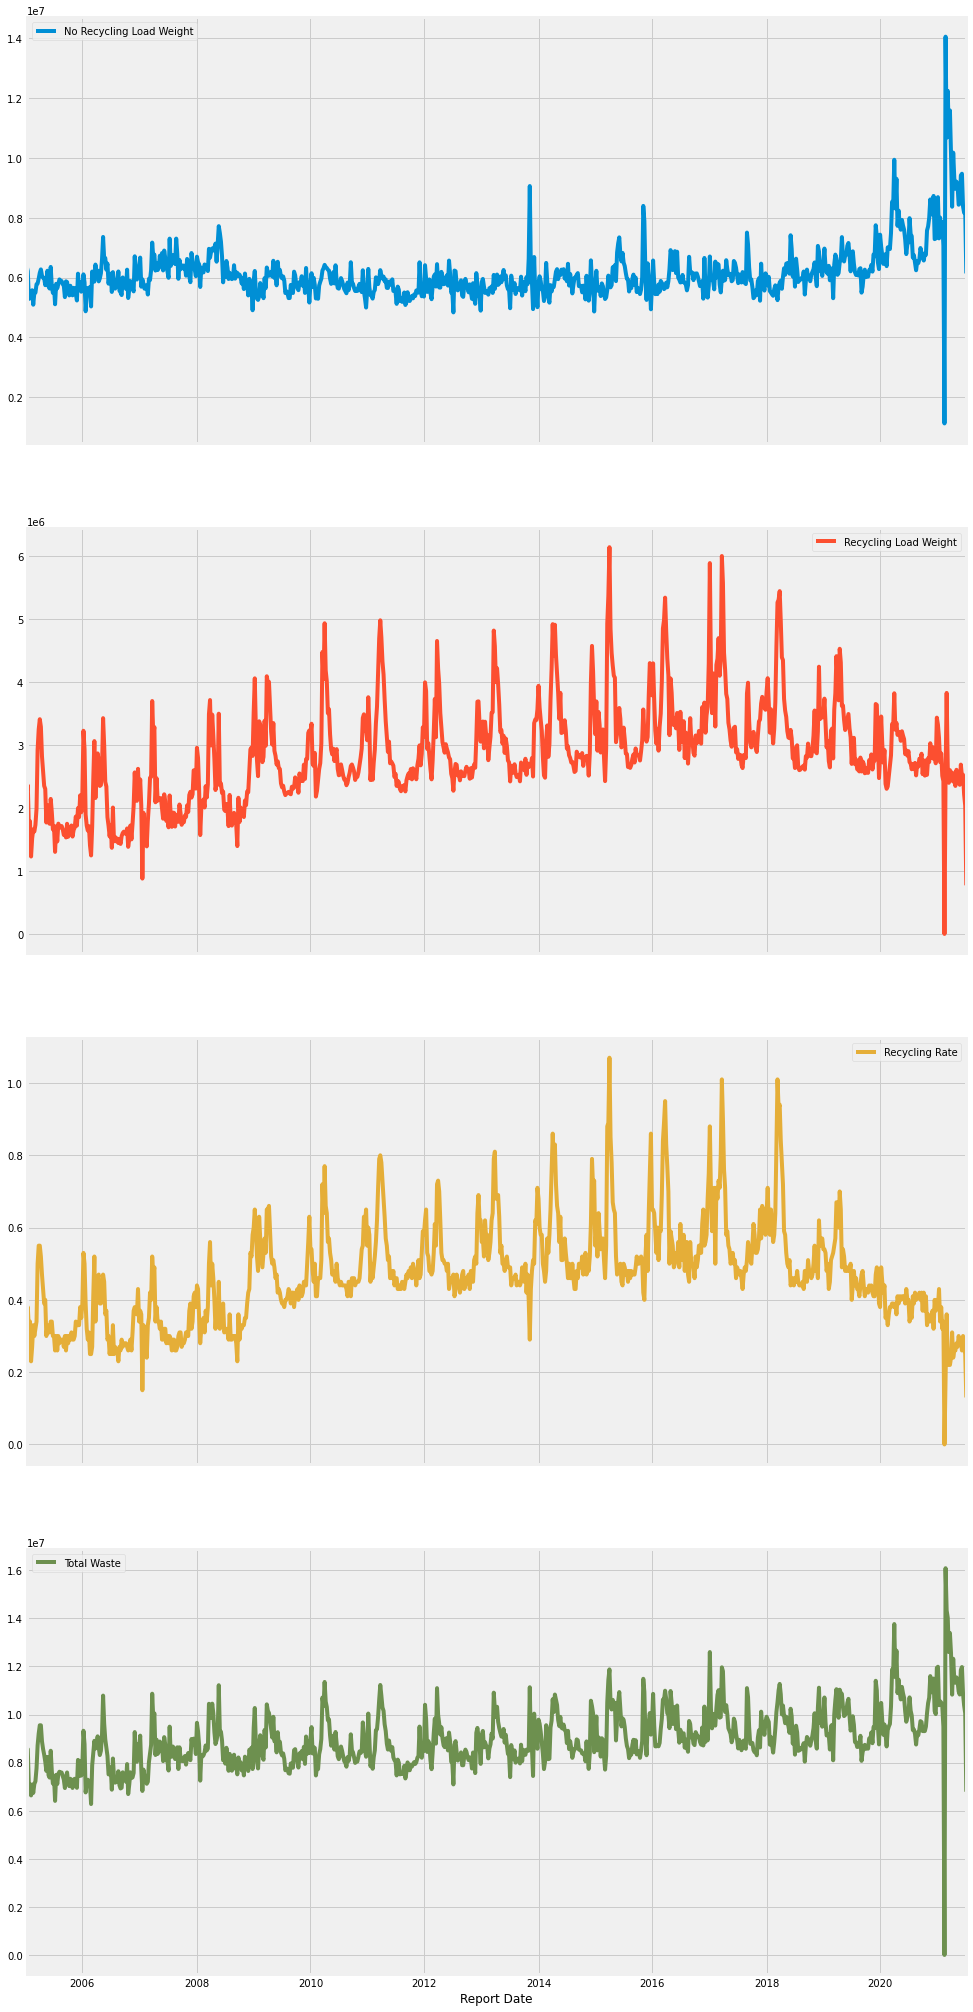

In [170]:
df3.plot(subplots=True, figsize=(15,36))
#plt.title('Recycling Rate from 2005 to 2021')
plt.savefig('waste.png')
plt.show()

In [171]:
df4 = df3

## Processing data for modelling

In [172]:
def process_data(lags, attr):
    df1 = df4[df4.index <= '2016']
    df2 = df4[df4.index >= '2017']
    df2 = df2[df2.index <= '2019']
    df3 = df4[df4.index >= '2020']
    df3 = df3[df3.index <= '2021']
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(df1[attr].values.reshape(-1, 1))
    flow1 = scaler.transform(df1[attr].values.reshape(-1, 1)).reshape(1, -1)[0]
    flow2 = scaler.transform(df2[attr].values.reshape(-1, 1)).reshape(1, -1)[0]
    flow3 = scaler.transform(df3[attr].values.reshape(-1, 1)).reshape(1, -1)[0]
    train, test1, test2 = [], [], []
    for i in range(lags, len(flow1)):
        train.append(flow1[i - lags: i + 1])
    for i in range(lags, len(flow2)):
        test1.append(flow2[i - lags: i + 1])
    for i in range(lags, len(flow3)):
        test2.append(flow3[i - lags: i + 1])
    train = np.array(train)
    test1 = np.array(test1)
    test2 = np.array(test2)
    np.random.shuffle(train)
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test1 = test1[:, :-1]
    y_test1 = test1[:, -1]
    X_test2 = test2[:, :-1]
    y_test2 = test2[:, -1]
    return X_train, y_train, X_test1, y_test1, X_test2, y_test2, scaler

def get_lstm(units):
    model = Sequential()
    model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(LSTM(units[2]))
    model.add(Dropout(0.2))
    model.add(Dense(units[3], activation='sigmoid'))
    return model

def get_gru(units):
    model = Sequential()
    model.add(GRU(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(GRU(units[2]))
    model.add(Dropout(0.2))
    model.add(Dense(units[3], activation='sigmoid'))
    return model

def _get_sae(inputs, hidden, output):
    model = Sequential()
    model.add(Dense(hidden, input_dim=inputs, name='hidden'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(output, activation='sigmoid'))
    return model

def get_saes(layers):
    sae1 = _get_sae(layers[0], layers[1], layers[-1])
    sae2 = _get_sae(layers[1], layers[2], layers[-1])
    sae3 = _get_sae(layers[2], layers[3], layers[-1])
    saes = Sequential()
    saes.add(Dense(layers[1], input_dim=layers[0], name='hidden1'))
    saes.add(Activation('sigmoid'))
    saes.add(Dense(layers[2], name='hidden2'))
    saes.add(Activation('sigmoid'))
    saes.add(Dense(layers[3], name='hidden3'))
    saes.add(Activation('sigmoid'))
    saes.add(Dropout(0.2))
    saes.add(Dense(layers[4], activation='sigmoid'))
    models = [sae1, sae2, sae3, saes]
    return models

def train_model(model, X_train, y_train, name, config, attr):
    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    hist = model.fit(
        X_train, y_train,
        batch_size=config["batch"],
        epochs=config["epochs"],
        validation_split=0.05)
    model.save('model/' + attr + name + '.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('model/' + attr + name + ' loss.csv', encoding='utf-8', index=False)

def train_seas(models, X_train, y_train, name, config, attr):
    temp = X_train
    for i in range(len(models) - 1):
        if i > 0:
            p = models[i - 1]
            hidden_layer_model = Model(inputs=p.input,
                                       outputs=p.get_layer('hidden').output)
            temp = hidden_layer_model.predict(temp)
        m = models[i]
        m.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
        m.fit(temp, y_train, batch_size=config["batch"],
              epochs=config["epochs"],
              validation_split=0.05)
        models[i] = m
    saes = models[-1]
    for i in range(len(models) - 1):
        weights = models[i].get_layer('hidden').get_weights()
        saes.get_layer('hidden%d' % (i + 1)).set_weights(weights)
    train_model(saes, X_train, y_train, name, config, attr)

def MAPE(y_true, y_pred):
    y = [x for x in y_true if x > 0]
    y_pred = [y_pred[i] for i in range(len(y_true)) if y_true[i] > 0]
    num = len(y_pred)
    sums = 0
    for i in range(num):
        tmp = abs(y[i] - y_pred[i]) / y[i]
        sums += tmp
    mape = sums * (100 / num)
    return mape

def eva_regress(y_true, y_pred):
    mape = MAPE(y_true, y_pred)
    vs = metrics.explained_variance_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print('explained_variance_score:%f' % vs)
    print('mape:%f%%' % mape)
    print('mae:%f' % mae)
    print('mse:%f' % mse)
    print('rmse:%f' % math.sqrt(mse))
    print('r2:%f' % r2)

def plot_results(y_true, y_pred, name, date, attr):
    x = pd.date_range(date, periods=len(y_true), freq='1W')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y_true, label='True Data')
    ax.plot(x, y_pred, label=name)
    plt.legend()
    plt.grid(True)
    plt.xlabel('Day of the year')
    plt.ylabel(attr)
    date_format = mpl.dates.DateFormatter("%D")
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
    plt.show()

In [ ]:
#train for recycling rate

lag = 8
config = {"batch": 255, "epochs": 600}
X_train, y_train, _, _, _, _, _ = process_data(lag, 'Recycling Rate')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
m = get_lstm([lag, 64, 64, 1])
train_model(m, X_train, y_train, 'lstm', config, 'Recycling Rate')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
m = get_gru([lag, 64, 64, 1])
train_model(m, X_train, y_train, 'gru', config, 'Recycling Rate')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
m = get_saes([lag, 400, 400, 400, 1])
train_seas(m, X_train, y_train, 'saes', config, 'Recycling Rate')

In [174]:
# setup test

lag = 8
_, _, X_test1, y_test1, X_test2, y_test2, scaler = process_data(lag, 'Recycling Rate')
y_test1 = scaler.inverse_transform(y_test1.reshape(-1, 1)).reshape(1, -1)[0]
y_test2 = scaler.inverse_transform(y_test2.reshape(-1, 1)).reshape(1, -1)[0]
X_test1shared = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1]))
X_test2shared = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1]))
X_test1saes = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
X_test2saes = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
y_preds1 = []
y_preds2 = []

In [175]:
# test Recycling Rate lstm

lstm = load_model('model/Recycling Ratelstm.h5')
predicted1 = lstm.predict(X_test1shared)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = lstm.predict(X_test2shared)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]
eva_regress(y_test1, predicted1)

explained_variance_score:0.781686
mape:7.254555%
mae:0.044715
mse:0.004032
rmse:0.063495
r2:0.762977


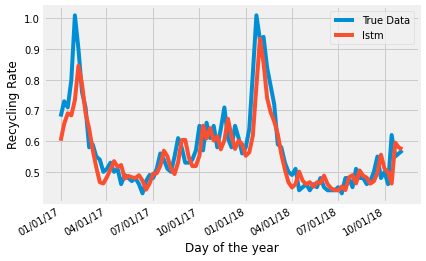

In [176]:
plot_results(y_test1[:288], predicted1[:288], 'lstm', '1-1-2017', 'Recycling Rate')

In [177]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.781686
mape:7.254555%
mae:0.044715
mse:0.004032
rmse:0.063495
r2:0.762977


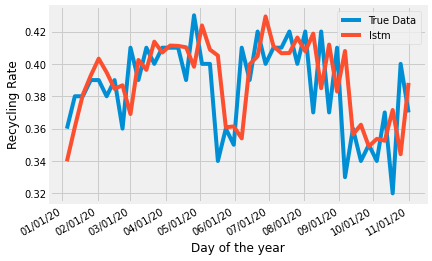

In [178]:
plot_results(y_test2[:288], predicted2[:288], 'lstm', '1-1-2020', 'Recycling Rate')

In [179]:
eva_regress(y_test2, predicted2)

explained_variance_score:-0.024499
mape:5.573927%
mae:0.020954
mse:0.000790
rmse:0.028114
r2:-0.045001


In [180]:
# test gru

gru = load_model('model/Recycling Rategru.h5')
predicted1 = gru.predict(X_test1shared)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = gru.predict(X_test2shared)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]

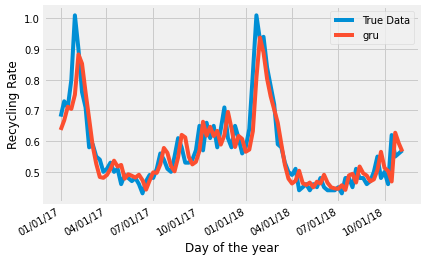

In [181]:
plot_results(y_test1[:288], predicted1[:288], 'gru', '1-1-2017', 'Recycling Rate')

In [182]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.793111
mape:7.038905%
mae:0.042410
mse:0.003546
rmse:0.059551
r2:0.791502


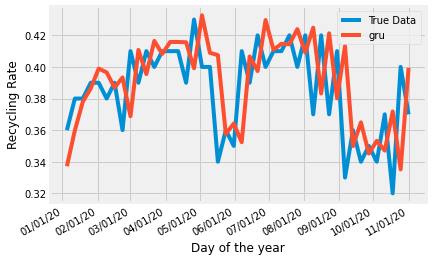

In [183]:
plot_results(y_test2[:288], predicted2[:288], 'gru', '1-1-2020', 'Recycling Rate')

In [184]:
eva_regress(y_test2, predicted2)

explained_variance_score:-0.235787
mape:6.342430%
mae:0.023852
mse:0.000963
rmse:0.031027
r2:-0.272765


In [185]:
# test saes

saes = load_model('model/Recycling Ratesaes.h5')
predicted1 = saes.predict(X_test1saes)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = saes.predict(X_test2saes)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]

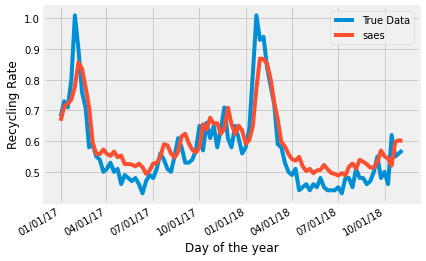

In [186]:
plot_results(y_test1[:288], predicted1[:288], 'saes', '1-1-2017', 'Recycling Rate')

In [187]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.778378
mape:9.494630%
mae:0.053258
mse:0.004431
rmse:0.066569
r2:0.739469


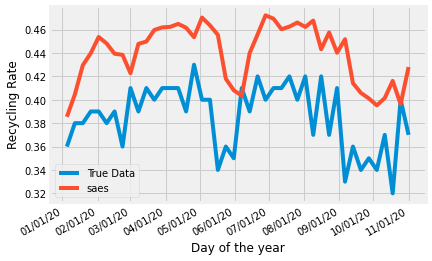

In [188]:
plot_results(y_test2[:288], predicted2[:288], 'saes', '1-1-2020', 'Recycling Rate')

In [189]:
eva_regress(y_test2, predicted2)

explained_variance_score:0.107045
mape:14.497169%
mae:0.054522
mse:0.003598
rmse:0.059979
r2:-3.756375


In [ ]:
#train for total waste

lag = 8
config = {"batch": 256, "epochs": 600}
X_train, y_train, _, _, _, _, _ = process_data(lag, 'Total Waste')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
m = get_lstm([lag, 64, 64, 1])
train_model(m, X_train, y_train, 'lstm', config, 'Total Waste')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
m = get_gru([lag, 64, 64, 1])
train_model(m, X_train, y_train, 'gru', config, 'Total Waste')
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
m = get_saes([lag, 400, 400, 400, 1])
train_seas(m, X_train, y_train, 'saes', config, 'Total Waste')

In [191]:
# test lstm

lstm = load_model('model/Total Wastelstm.h5')
predicted1 = lstm.predict(X_test1shared)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = lstm.predict(X_test2shared)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]

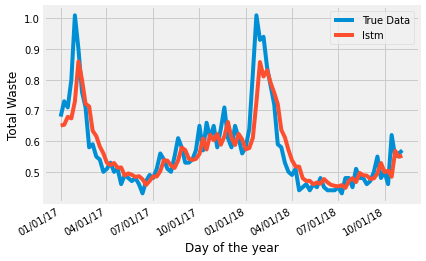

In [192]:
plot_results(y_test1[:288], predicted1[:288], 'lstm', '1-1-2017', 'Total Waste')

In [193]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.741383
mape:7.129680%
mae:0.044113
mse:0.004427
rmse:0.066538
r2:0.739711


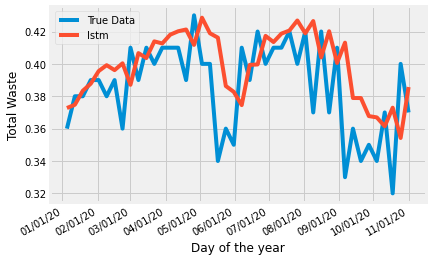

In [194]:
plot_results(y_test2[:288], predicted2[:288], 'lstm', '1-1-2020', 'Total Waste')

In [195]:
eva_regress(y_test2, predicted2)

explained_variance_score:0.109622
mape:5.988002%
mae:0.022082
mse:0.000852
rmse:0.029190
r2:-0.126508


In [196]:
# test gru

gru = load_model('model/Total Wastegru.h5')
predicted1 = gru.predict(X_test1shared)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = gru.predict(X_test2shared)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]

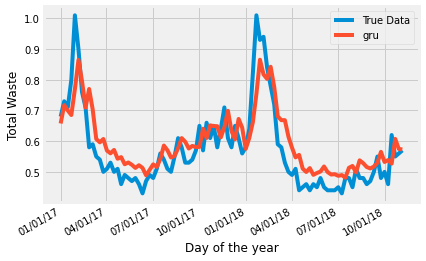

In [197]:
plot_results(y_test1[:288], predicted1[:288], 'gru', '1-1-2017', 'Total Waste')

In [198]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.728234
mape:10.166001%
mae:0.057695
mse:0.005295
rmse:0.072768
r2:0.688691


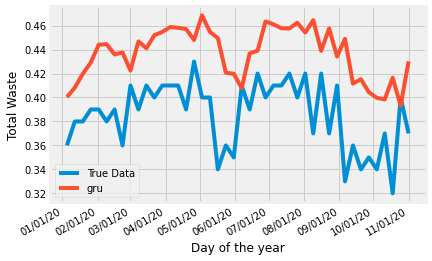

In [199]:
plot_results(y_test2[:288], predicted2[:288], 'gru', '1-1-2020', 'Total Waste')

In [200]:
eva_regress(y_test2, predicted2)

explained_variance_score:0.090625
mape:13.818775%
mae:0.051669
mse:0.003315
rmse:0.057577
r2:-3.383066


In [201]:
# test gru

saes = load_model('model/Total Wastesaes.h5')
predicted1 = saes.predict(X_test1shared)
predicted1 = scaler.inverse_transform(predicted1.reshape(-1, 1)).reshape(1, -1)[0]
predicted2 = saes.predict(X_test2shared)
predicted2 = scaler.inverse_transform(predicted2.reshape(-1, 1)).reshape(1, -1)[0]

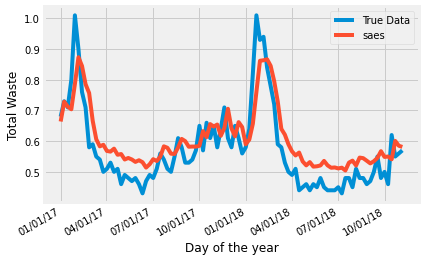

In [202]:
plot_results(y_test1[:288], predicted1[:288], 'saes', '1-1-2017', 'Total Waste')

In [203]:
eva_regress(y_test1, predicted1)

explained_variance_score:0.744224
mape:11.403691%
mae:0.063184
mse:0.005646
rmse:0.075142
r2:0.668040


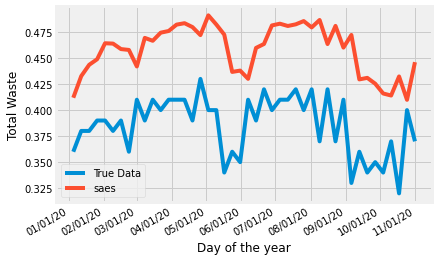

In [204]:
plot_results(y_test2[:288], predicted2[:288], 'saes', '1-1-2020', 'Total Waste')

In [205]:
eva_regress(y_test2, predicted2)

explained_variance_score:0.103391
mape:19.225358%
mae:0.072540
mse:0.005940
rmse:0.077072
r2:-6.853695
